## Exploring the data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('TSLA.csv') #Reading the supplied data

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
findf = df.drop(['Date','Adj Close'],axis = 1) #Dropping the unrequired columns

In [5]:
findf.head()

,Open,High,Low,Close,Volume
0,19.000000,25.00,17.540001,23.889999,18766300
1,25.790001,30.42,23.299999,23.830000,17187100
2,25.000000,25.92,20.270000,21.959999,8218800
3,23.000000,23.10,18.709999,19.200001,5139800
4,20.000000,20.00,15.830000,16.110001,6866900


In [6]:
findf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2416 non-null   float64
 1   High    2416 non-null   float64
 2   Low     2416 non-null   float64
 3   Close   2416 non-null   float64
 4   Volume  2416 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 94.5 KB


## Checking for discerete values

In [7]:
attributes = ['Close','High','Low','Open','Volume']
findf[attributes].value_counts()

Close       High        Low         Open        Volume  
15.800000   16.629999   14.980000   16.400000   6921700     1
246.649994  254.729996  245.460007  250.460007  3703200     1
246.869995  250.070007  245.320007  247.000000  3725200     1
246.949997  254.960007  246.100006  252.520004  4834200     1
246.990005  252.119995  243.639999  249.119995  13475300    1
                                                           ..
141.600006  141.699997  134.210007  137.000000  9061500     1
142.000000  143.910004  140.970001  141.630005  7108100     1
142.149994  145.729996  141.100006  144.750000  9254500     1
142.190002  145.869995  139.860001  140.050003  10748200    1
780.000000  786.140015  673.520020  673.690002  47065000    1
Name: count, Length: 2416, dtype: int64

## Finding Correlations

In [8]:
corr_matrix = findf.corr()
corr_matrix['Close'].sort_values(ascending = False)

Close     1.000000
High      0.999640
Low       0.999447
Open      0.998886
Volume    0.505169
Name: Close, dtype: float64

array([[<Axes: xlabel='Close', ylabel='Close'>,
        <Axes: xlabel='High', ylabel='Close'>,
        <Axes: xlabel='Low', ylabel='Close'>,
        <Axes: xlabel='Open', ylabel='Close'>,
        <Axes: xlabel='Volume', ylabel='Close'>],
       [<Axes: xlabel='Close', ylabel='High'>,
        <Axes: xlabel='High', ylabel='High'>,
        <Axes: xlabel='Low', ylabel='High'>,
        <Axes: xlabel='Open', ylabel='High'>,
        <Axes: xlabel='Volume', ylabel='High'>],
       [<Axes: xlabel='Close', ylabel='Low'>,
        <Axes: xlabel='High', ylabel='Low'>,
        <Axes: xlabel='Low', ylabel='Low'>,
        <Axes: xlabel='Open', ylabel='Low'>,
        <Axes: xlabel='Volume', ylabel='Low'>],
       [<Axes: xlabel='Close', ylabel='Open'>,
        <Axes: xlabel='High', ylabel='Open'>,
        <Axes: xlabel='Low', ylabel='Open'>,
        <Axes: xlabel='Open', ylabel='Open'>,
        <Axes: xlabel='Volume', ylabel='Open'>],
       [<Axes: xlabel='Close', ylabel='Volume'>,
        <Axes: xlab

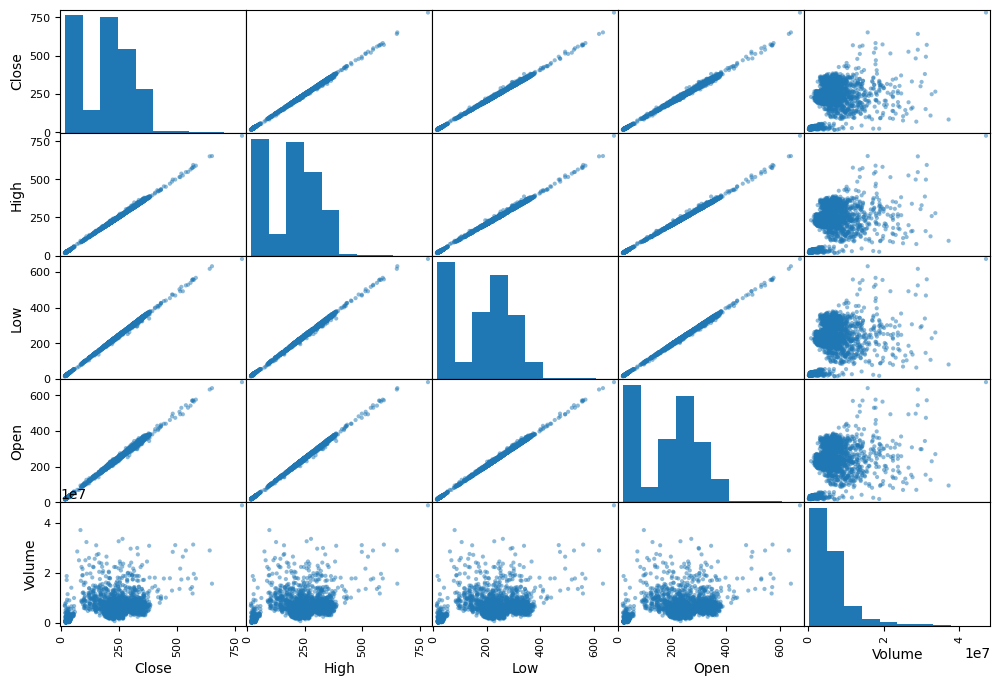

In [9]:
pd.plotting.scatter_matrix(findf[attributes],figsize = (12,8))

## Checking for Null Values

In [10]:
findf.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## Splitting features and models

In [11]:
import numpy as np
x = np.array(findf.drop("Close",axis = 1))
y = np.array(findf["Close"].copy())

## Train-test splitting

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

## Choosing the model

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

## Testing the model and evaluating its performance

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
y_pred = model.predict(x_test)

In [16]:
mse = mean_squared_error(y_pred, y_test)

In [17]:
rmse = np.sqrt(mse)

In [18]:
rmse

2.09270994034476

In [19]:
model.score(x_test,y_test)

0.9997117604197432

## Saving the model using joblib

In [20]:
from joblib import dump
dump(model, 'Tesla.joblib')

['Tesla.joblib']

LINEAR REGRESSION

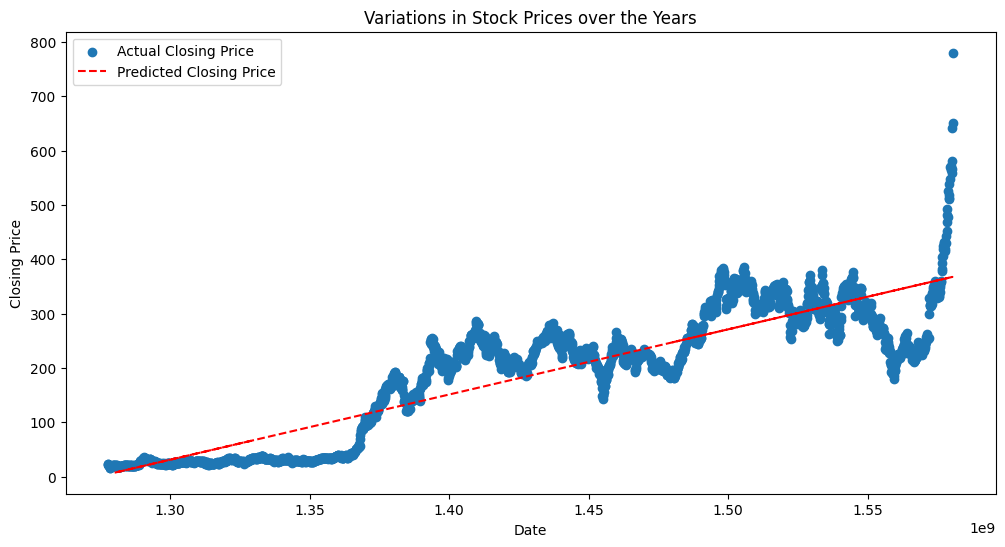

Prediction Time: 0.003423452377319336 seconds
Training Time: 0.002617359161376953 seconds
Accuracy (within 5% threshold): 0.10


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error, r2_score

# Define a function to calculate accuracy based on a threshold
def accuracy(y_true, y_pred, threshold=0.05):
    # Count the number of predictions within the threshold
    within_threshold = sum(abs(y_true - y_pred) / y_true <= threshold)
    # Calculate the proportion of predictions within the threshold
    acc = within_threshold / len(y_true)
    return acc

# Load the dataset
data = pd.read_csv("TSLA.csv")

# Preprocess the data
data['Date'] = pd.to_datetime(data['Date'])  # Convert Date column to datetime object
data['Date'] = data['Date'].apply(lambda x: x.timestamp())  # Convert datetime to Unix timestamp

# Extract features (date) and target (closing price)
X = data[['Date']]
y = data['Close']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model and measure training time
start_time = time.time()
model = LinearRegression()
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Predict on the testing set and measure prediction time
start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time

# Plot the graph showing variations in stock prices over the years
plt.figure(figsize=(12, 6))
plt.scatter(data['Date'], data['Close'], label='Actual Closing Price')
plt.plot(X_test, y_pred, label='Predicted Closing Price', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Variations in Stock Prices over the Years')
plt.legend()
plt.show()

# Print prediction time, training time, and accuracy
print("Prediction Time:", prediction_time, "seconds")
print("Training Time:", training_time, "seconds")

# Calculate accuracy based on a threshold of 5%
acc = accuracy(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")


DEISION TREE CLASSIFICATION

Accuracy: 0.7210743801652892
Training Time: 0.05283308029174805 seconds
Prediction Time: 0.0033440589904785156 seconds


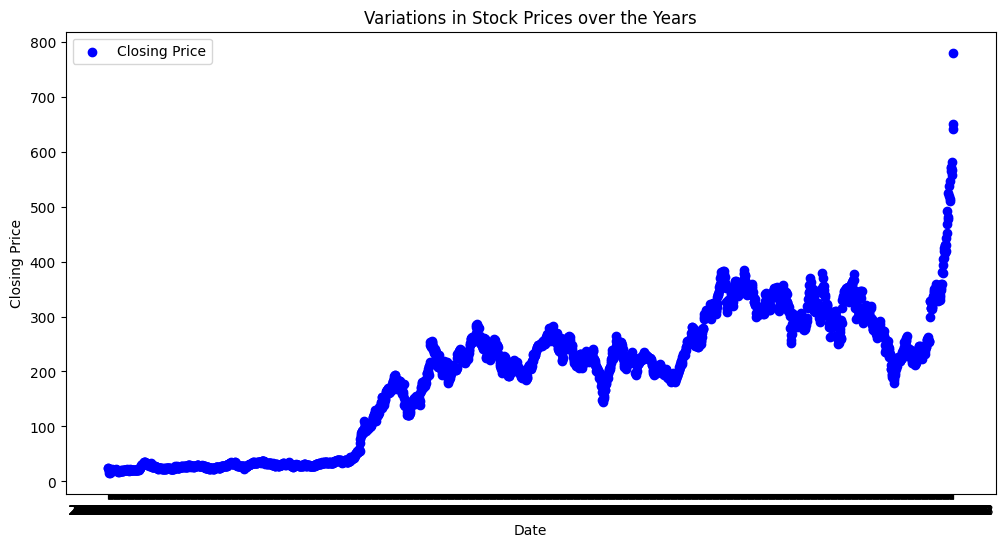

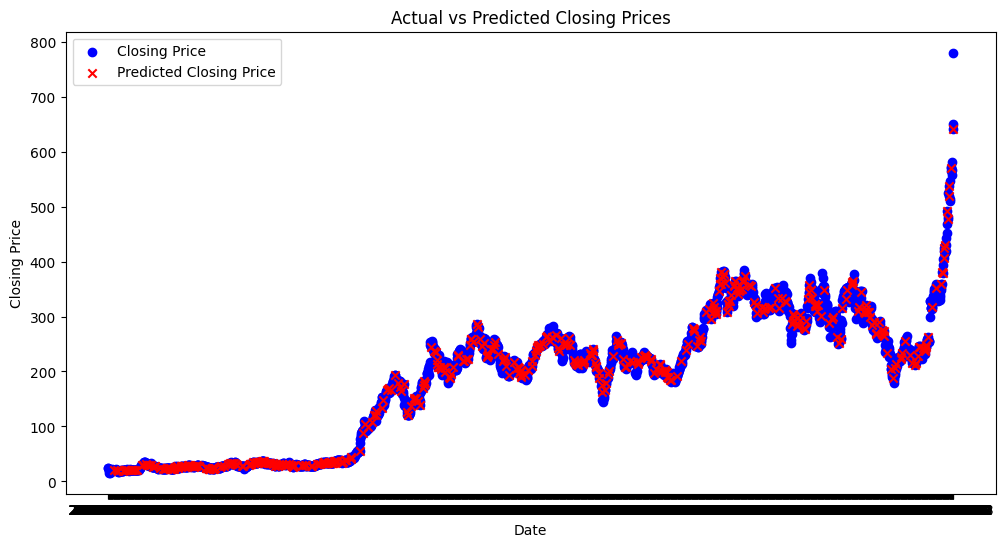

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import time

# Load the dataset
data = pd.read_csv("TSLA.csv")

# Create a new column indicating whether the closing price increased (1) or decreased (0) compared to the previous day
data['Target'] = (data['Close'] > data['Close'].shift(1)).astype(int)

# Drop the first row since it doesn't have a previous day's closing price
data = data.dropna()

# Define features (independent variables) and target (dependent variable)
X = data[['Open', 'High', 'Low', 'Close', 'Volume']]  # Using OHLCV data as features
y = data['Target']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree classifier and measure training time
start_time = time.time()
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Predict on the testing set and measure prediction time
start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print training and prediction times
print("Training Time:", training_time, "seconds")
print("Prediction Time:", prediction_time, "seconds")

# Plot the graph showing variations in stock prices over the years
plt.figure(figsize=(12, 6))
plt.scatter(data['Date'], data['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Variations in Stock Prices over the Years')
plt.legend()
plt.show()

# Predict on the testing set
y_pred = model.predict(X_test)

# Plot the graph showing variations in stock prices over the years
plt.figure(figsize=(12, 6))
plt.scatter(data['Date'], data['Close'], label='Closing Price', color='blue')

# Plot the predicted closing prices on the testing set
plt.scatter(X_test.index, X_test['Close'], label='Predicted Closing Price', color='red', marker='x')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.show()


c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


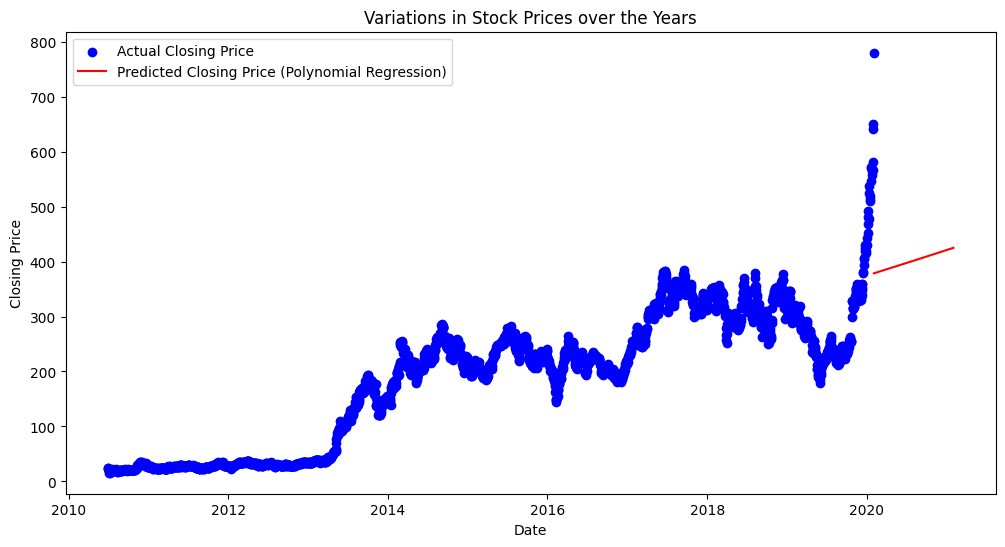

Accuracy (within 5.0% threshold): 0.11
Training Time: 0.00 seconds


DESCISSION TREE CLASSIFIER

Accuracy: 0.7128099173553719
Training Time: 0.07370185852050781 seconds
Prediction Time: 0.002074718475341797 seconds
Mean Absolute Error (MAE): 0.2871900826446281
Mean Squared Error (MSE): 0.2871900826446281


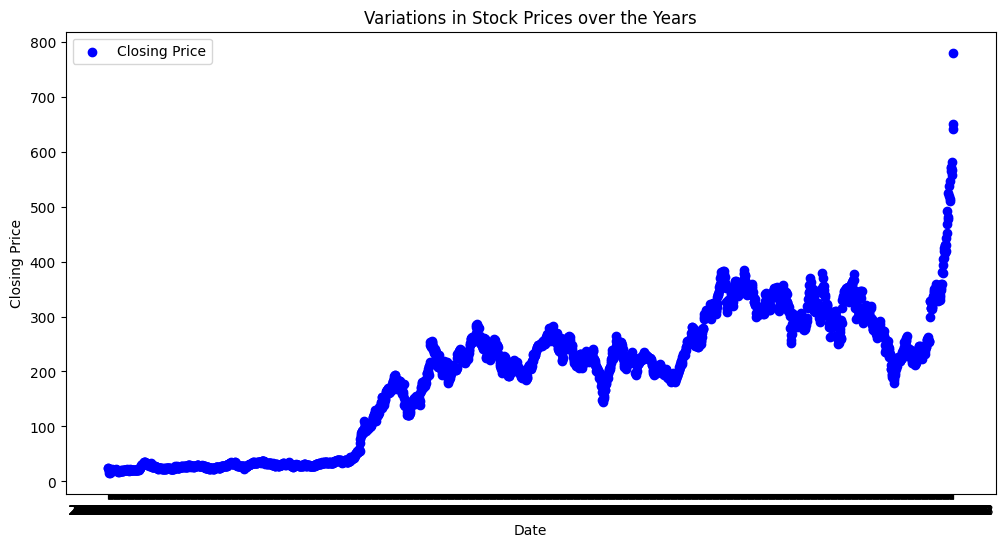

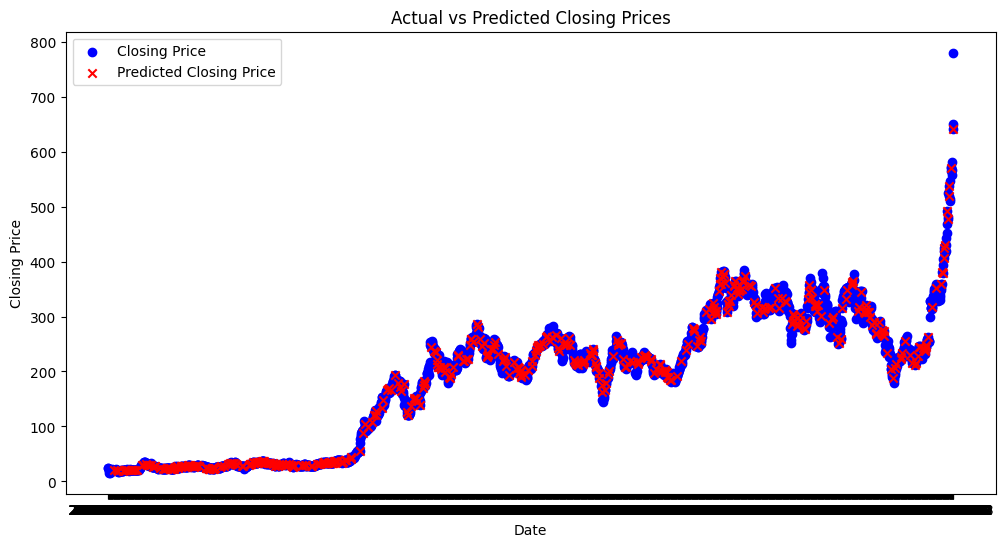

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import time

# Load the dataset
data = pd.read_csv("TSLA.csv")

# Create a new column indicating whether the closing price increased (1) or decreased (0) compared to the previous day
data['Target'] = (data['Close'] > data['Close'].shift(1)).astype(int)

# Drop the first row since it doesn't have a previous day's closing price
data = data.dropna()

# Define features (independent variables) and target (dependent variable)
X = data[['Open', 'High', 'Low', 'Close', 'Volume']]  # Using OHLCV data as features
y = data['Target']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree classifier and measure training time
start_time = time.time()
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Predict on the testing set and measure prediction time
start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print training and prediction times
print("Training Time:", training_time, "seconds")
print("Prediction Time:", prediction_time, "seconds")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


# Plot the graph showing variations in stock prices over the years
plt.figure(figsize=(12, 6))
plt.scatter(data['Date'], data['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Variations in Stock Prices over the Years')
plt.legend()
plt.show()

# Plot the graph showing actual vs predicted closing prices
plt.figure(figsize=(12, 6))
plt.scatter(data['Date'], data['Close'], label='Closing Price', color='blue')
plt.scatter(X_test.index, X_test['Close'], label='Predicted Closing Price', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.show()


KNN CLASSIFIER

Training Time:  0.008252382278442383
Prediction Time:  0.00870203971862793
Mean Squared Error:  205.84209022119953
Accuracy (within 5% threshold):  0.8429752066115702


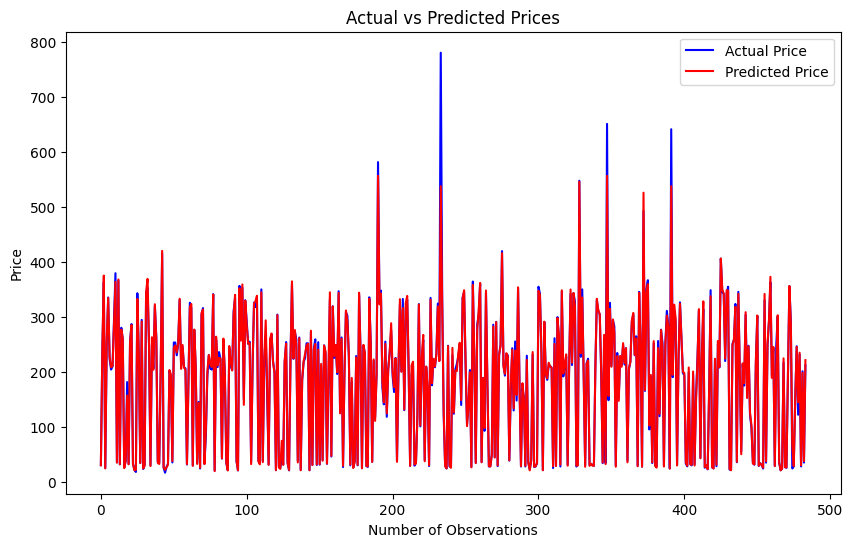

In [9]:
# Import necessary libraries
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('TSLA.csv')

# Convert the date column to datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Create new columns for year, month, and day
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Day'] = dataset['Date'].dt.day

# Now you can drop the original 'Date' column
dataset = dataset.drop(columns=['Date'])


# Assume 'Close' is the column for closing prices
X = dataset.iloc[:, :-1].values
y = dataset['Close'].values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the KNN model on the training data
knn = KNeighborsRegressor(n_neighbors=5)

# Calculate training time
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print("Training Time: ", training_time)

# Calculate prediction time
start_time = time.time()
y_pred = knn.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time
print("Prediction Time: ", prediction_time)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

# Calculate accuracy within a threshold
threshold = 0.05  # 5% threshold
accuracy = sum(abs(y_pred - y_test) / y_test <= threshold) / len(y_test)
print("Accuracy (within 5% threshold): ", accuracy)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, color='blue', label='Actual Price')
plt.plot(y_pred, color='red', label='Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Number of Observations')
plt.ylabel('Price')
plt.legend()
plt.show()


Epoch 1/50
76/76 [==============================] - 2s 7ms/step - loss: 0.0164
Epoch 2/50
76/76 [==============================] - 1s 7ms/step - loss: 2.6492e-04
Epoch 3/50
76/76 [==============================] - 1s 7ms/step - loss: 2.2803e-04
Epoch 4/50
76/76 [==============================] - 0s 7ms/step - loss: 2.3016e-04
Epoch 5/50
76/76 [==============================] - 0s 6ms/step - loss: 2.2678e-04
Epoch 6/50
76/76 [==============================] - 0s 6ms/step - loss: 2.1319e-04
Epoch 7/50
76/76 [==============================] - 0s 6ms/step - loss: 2.2322e-04
Epoch 8/50
76/76 [==============================] - 0s 6ms/step - loss: 2.1007e-04
Epoch 9/50
76/76 [==============================] - 0s 6ms/step - loss: 1.9289e-04
Epoch 10/50
76/76 [==============================] - 0s 6ms/step - loss: 1.9055e-04
Epoch 11/50
76/76 [==============================] - 0s 6ms/step - loss: 1.8044e-04
Epoch 12/50
76/76 [==============================] - 0s 6ms/step - loss: 1.9147e-04
Epoch

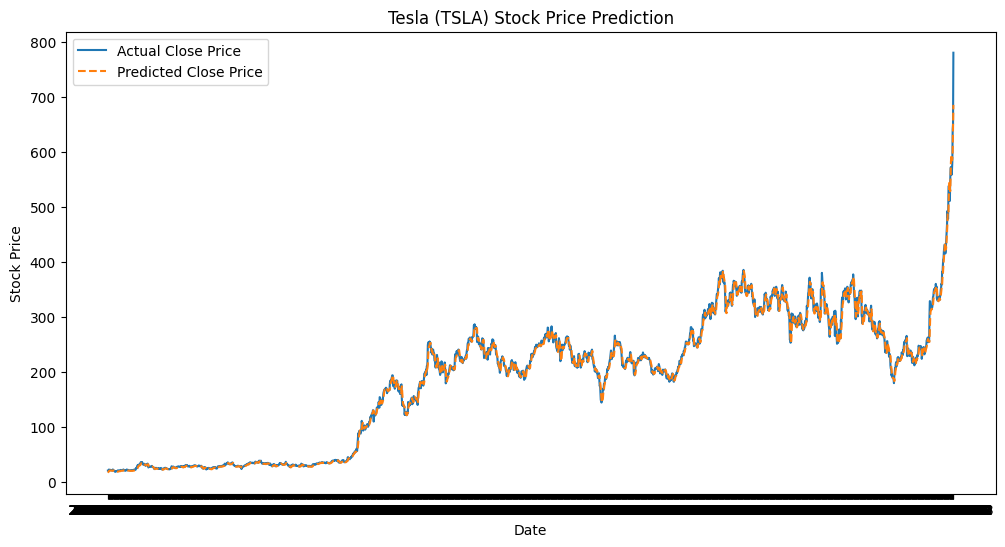

R-squared (Accuracy) on training data: 1.00


In [4]:
# # import pandas as pd
# # import numpy as np
# # import matplotlib.pyplot as plt
# # from sklearn.preprocessing import MinMaxScaler
# # from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# # from tensorflow.keras.models import Sequential
# # from tensorflow.keras.layers import LSTM, Dense
# # import time

# # # Load the TSLA.csv file
# # data = pd.read_csv('TSLA.csv')
# # close_prices = data['Close'].values.reshape(-1, 1)

# # # Normalize the data using Min-Max scaling
# # scaler = MinMaxScaler()
# # scaled_prices = scaler.fit_transform(close_prices)

# # # Create input sequences
# # sequence_length = 10
# # X, y = [], []
# # for i in range(len(scaled_prices) - sequence_length):
# #     X.append(scaled_prices[i:i + sequence_length])
# #     y.append(scaled_prices[i + sequence_length])

# # X = np.array(X)
# # y = np.array(y)

# # # Build the LSTM model
# # model = Sequential()
# # model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
# # model.add(Dense(1))
# # model.compile(optimizer='adam', loss='mean_squared_error')

# # # Train the model
# # start_time = time.time()
# # model.fit(X, y, epochs=50, batch_size=32)
# # training_time = time.time() - start_time

# # # Predict on training data
# # start_time = time.time()
# # train_predictions = model.predict(X)
# # prediction_time = time.time() - start_time

# # # Inverse transform predictions to get actual stock prices
# # train_predictions = scaler.inverse_transform(train_predictions)

# # # Calculate MSE and MAE for training data
# # mse_train = mean_squared_error(close_prices[sequence_length:], train_predictions)
# # mae_train = mean_absolute_error(close_prices[sequence_length:], train_predictions)

# # print(f"Mean Squared Error (MSE) on training data: {mse_train:.2f}")
# # print(f"Mean Absolute Error (MAE) on training data: {mae_train:.2f}")
# # print(f"Training time: {training_time:.2f} seconds")
# # print(f"Prediction time: {prediction_time:.2f} seconds")

# # # Plot predicted vs. actual values
# # plt.figure(figsize=(12, 6))
# # plt.plot(data['Date'][sequence_length:], close_prices[sequence_length:], label='Actual Close Price')
# # plt.plot(data['Date'][sequence_length:], train_predictions, label='Predicted Close Price', linestyle='--')
# # plt.xlabel('Date')
# # plt.ylabel('Stock Price')
# # plt.title('Tesla (TSLA) Stock Price Prediction')
# # plt.legend()
# # plt.show()

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# import time

# # Load the TSLA.csv file
# data = pd.read_csv('TSLA.csv')
# close_prices = data['Close'].values.reshape(-1, 1)

# # Normalize the data using Min-Max scaling
# scaler = MinMaxScaler()
# scaled_prices = scaler.fit_transform(close_prices)

# # Create input sequences
# sequence_length = 10
# X, y = [], []
# for i in range(len(scaled_prices) - sequence_length):
#     X.append(scaled_prices[i:i + sequence_length])
#     y.append(scaled_prices[i + sequence_length])

# X = np.array(X)
# y = np.array(y)

# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
# start_time = time.time()
# model.fit(X, y, epochs=50, batch_size=32)
# training_time = time.time() - start_time

# # Predict on training data
# start_time = time.time()
# train_predictions = model.predict(X)
# prediction_time = time.time() - start_time

# # Inverse transform predictions to get actual stock prices
# train_predictions = scaler.inverse_transform(train_predictions)

# # Calculate MSE and MAE for training data
# mse_train = mean_squared_error(close_prices[sequence_length:], train_predictions)
# mae_train = mean_absolute_error(close_prices[sequence_length:], train_predictions)

# print(f"Mean Squared Error (MSE) on training data: {mse_train:.2f}")
# print(f"Mean Absolute Error (MAE) on training data: {mae_train:.2f}")
# print(f"Training time: {training_time:.2f} seconds")
# print(f"Prediction time: {prediction_time:.2f} seconds")

# # Plot predicted vs. actual values
# plt.figure(figsize=(12, 6))
# plt.plot(data['Date'][sequence_length:], close_prices[sequence_length:], label='Actual Close Price')
# plt.plot(data['Date'][sequence_length:], train_predictions, label='Predicted Close Price', linestyle='--')
# plt.xlabel('Date')
# plt.ylabel('Stock Price')
# plt.title('Tesla (TSLA) Stock Price Prediction')
# plt.legend()
# plt.show()

# # Calculate R-squared (Accuracy) on training data
# y_true = close_prices[sequence_length:]
# r2_train = r2_score(y_true, train_predictions)
# print(f"R-squared (Accuracy) on training data: {r2_train:.2f}")


RLSTM 
Recurrent Long Short-Term Memory

Epoch 1/100


c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 0.0184 - val_loss: 0.0020
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 5.5939e-04 - val_loss: 0.0015
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 2.7877e-04 - val_loss: 0.0013
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 2.5842e-04 - val_loss: 0.0015
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 2.4777e-04 - val_loss: 0.0013
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 2.5012e-04 - val_loss: 0.0014
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 2.5223e-04 - val_loss: 0.0013
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 2.4575e-04 - val_loss: 0.0013
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 2.4002e-04 - val_loss: 0.0012
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 2.1571e-04 - val_loss: 0.0012
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 2.1201e-04 - val_loss: 0.0013
Epoch 12/100
29/29 ━━━━

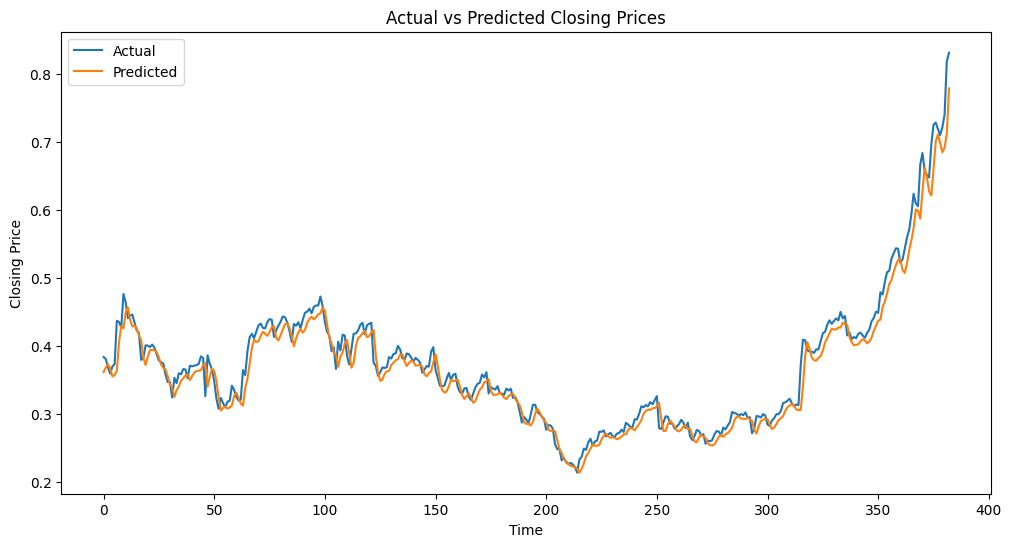

Training Time: 220.4039716720581
Prediction Time: 1.0503220558166504
Accuracy (within 5% threshold): 135.78067885117494


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import time
import matplotlib.pyplot as plt

# Define a function to create dataset for LSTM
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Define a function to calculate accuracy within a threshold
def accuracy_within_threshold(true_values, predicted_values, threshold):
    error = np.abs(true_values - predicted_values)
    within_threshold = np.sum(error <= threshold)
    total_samples = len(true_values)
    accuracy = within_threshold / total_samples
    return accuracy

# Load the dataset
data = pd.read_csv("TSLA.csv")

# Extract the relevant feature
close_prices = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.80)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

# Prepare the data for LSTM
time_steps = 100
X_train, y_train = create_dataset(train, time_steps)
X_test, y_test = create_dataset(test, time_steps)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and record the training time
start_time = time.time()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)
training_time = time.time() - start_time

# Make predictions and record prediction time
start_time = time.time()
predicted_values = model.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy within a threshold
threshold = 0.05  # 5% threshold
accuracy = accuracy_within_threshold(y_test, predicted_values, threshold)

# Plot a graph for predicted values against actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(predicted_values, label='Predicted')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

print("Training Time:", training_time)
print("Prediction Time:", prediction_time)
print("Accuracy (within 5% threshold):", accuracy)


LSTM

Epoch 1/50


c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0485 - val_loss: 0.0136
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0109 - val_loss: 0.0104
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0085 - val_loss: 0.0077
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0065 - val_loss: 0.0061
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0054 - val_loss: 0.0055
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0051 - val_loss: 0.0054
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0054 - val_loss: 0.0053
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0047 - val_loss: 0.0053
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0050 - val_loss: 0.0053
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0048 - val_loss: 0.0052
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0048 - val_loss: 0.0052


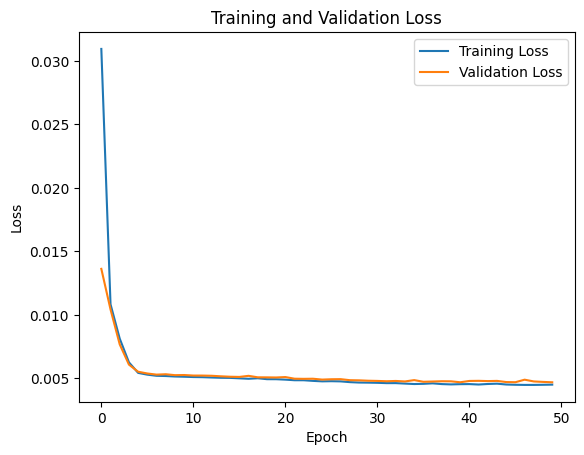

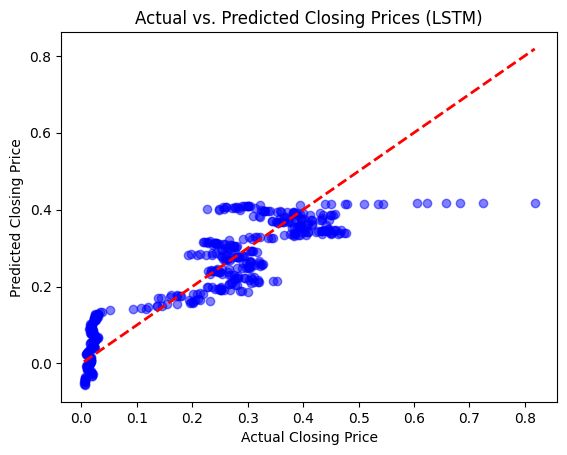

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
import time

# Define a function to calculate accuracy within a threshold
def accuracy_within_threshold(true_values, predicted_values, threshold):
    error = np.abs(true_values - predicted_values)
    within_threshold = np.sum(error <= threshold)
    total_samples = len(true_values)
    accuracy = within_threshold / total_samples
    return accuracy

# Load the dataset
data = pd.read_csv("TSLA.csv")

# Preprocess the data
data['Date'] = pd.to_datetime(data['Date'])  # Convert Date column to datetime object
data['Date'] = data['Date'].apply(lambda x: x.timestamp())
# Define features (date) and target (closing price)
X = data[['Date']].values
y = data['Close'].values

# Normalize the data
X = (X - X.min()) / (X.max() - X.min())
y = (y - y.min()) / (y.max() - y.min())

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for LSTM input (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model and measure training time
start_time = time.time()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)
training_time = time.time() - start_time

# Predict on the testing set and measure prediction time
start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate accuracy within a threshold
threshold = 0.05  # 5% threshold
accuracy = accuracy_within_threshold(y_test, y_pred, threshold)
print("Accuracy (within 5% threshold):", accuracy)

# Print training and prediction times
print("Training Time:", training_time, "seconds")
print("Prediction Time:", prediction_time, "seconds")

# Plot training loss and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot actual vs. predicted closing prices
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.title('Actual vs. Predicted Closing Prices (LSTM)')
plt.show()


In [ ]:
|